<a href="https://colab.research.google.com/github/sebastianaragon/Proyecto-telecomunicaciones/blob/main/challenge_wom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hackathon 2023


1.   Juan Sebastian del Mar Aragon Rios
2.   Carlos Santiago Gongora Ramirez





##Importamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import  MarkerCluster
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#from google.colab import files
#uploaded = files.upload()

##Conectar Google Colab con Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
ruta='/content/Hackaton_Base_Line_Celdas_Wom.csv'
dt=pd.read_csv(ruta,sep=';')
dt.head()

,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Azimuth,ET,MT,HBW,VBW,Max Power,EARFCN,Bandwidth,MCC,MNC,Band,City,Cluster
0,258823,1011,7,4.625846,-74.177726,26.0,350,6.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
1,258824,1011,8,4.625846,-74.177726,26.0,90,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
2,258825,1011,9,4.625846,-74.177726,26.0,210,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
3,259079,1012,7,4.610833,-74.184167,20.0,5,8.0,0,65,7.0,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
4,259080,1012,8,4.610833,-74.184167,20.0,135,12.0,0,65,7.0,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1


##visualizacion geografica de celdas

In [ ]:
# Create the map
m_3 = folium.Map(location=[6.99988,-74.18089], tiles='cartodbpositron', zoom_start=6.5)

# Add points to the map
mc = MarkerCluster()
for idx, row in dt.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
m_3.add_child(mc)

# Display the map
m_3

##Datos Kpis

Hay que cargar el archivo cell_capacity_wom_pm.parquet

In [ ]:
df_2 = pd.read_parquet("/content/cell_capacity_wom_pm.parquet")
df_2.columns

Index(['key', 'Cell Code', 'Site Code', 'Sector ID', 'DateTime', 'Date',
       'Time', 'Avg User Downlink Throughput (kbit/s)',
       'Avg PRB Downlink Usage (%)', 'Avg Active User Downlink'],
      dtype='object')

##Prediccion del porcentaje de uso de los recursos

In [ ]:
df_2.dropna(axis=0,inplace=True)
df_2

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,Avg User Downlink Throughput (kbit/s),Avg PRB Downlink Usage (%),Avg Active User Downlink
22,2023-07-23 22:00:00-281349,281349,1099,5,2023-07-23 22:00:00,2023-07-23,22:00,5771.93,6.49,0.064
36,2023-07-24 12:00:00-281349,281349,1099,5,2023-07-24 12:00:00,2023-07-24,12:00,7336.77,10.18,0.097
61,2023-07-25 13:00:00-281349,281349,1099,5,2023-07-25 13:00:00,2023-07-25,13:00,5350.18,15.57,0.189
85,2023-07-26 13:00:00-281349,281349,1099,5,2023-07-26 13:00:00,2023-07-26,13:00,892.12,6.64,0.233
108,2023-07-27 12:00:00-281349,281349,1099,5,2023-07-27 12:00:00,2023-07-27,12:00,3356.66,6.90,0.057
...,...,...,...,...,...,...,...,...,...,...
555919,2023-07-31 20:00:00-320261,320261,1251,5,2023-07-31 20:00:00,2023-07-31,20:00,1388.30,96.67,8.988
555944,2023-08-01 21:00:00-320261,320261,1251,5,2023-08-01 21:00:00,2023-08-01,21:00,827.61,97.41,11.205
555968,2023-08-02 21:00:00-320261,320261,1251,5,2023-08-02 21:00:00,2023-08-02,21:00,808.59,97.62,12.878
555993,2023-08-03 22:00:00-320261,320261,1251,5,2023-08-03 22:00:00,2023-08-03,22:00,956.91,97.41,11.456


#seleccionamos nuestra variable objetivo "Avg PRB Downlink Usage (%)"

In [ ]:
y=df_2['Avg PRB Downlink Usage (%)']


##Seleccionamos las dos variables con las cuales alimentaremos nuestro modelo (preeliminar)

In [ ]:
kpis_features=['Avg User Downlink Throughput (kbit/s)','Avg Active User Downlink']
x=df_2[kpis_features]
x.describe()

,Avg User Downlink Throughput (kbit/s),Avg Active User Downlink
count,23181.000000,23181.000000
mean,6205.254942,3.792050
std,4757.271950,4.010652
min,413.880000,0.002000
25%,2778.150000,1.119000
50%,4961.040000,2.454000
75%,8247.590000,5.069000
max,87580.860000,45.866000


In [ ]:


# Define model. Specify a number for random_state to ensure same results each run
resource_model = DecisionTreeRegressor(random_state=1)

# Fit model
resource_model.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
print('prediccion para los primeros 5 valores')
print(x.head())
print('la prediccion es')
print(resource_model.predict(x.head()))

prediccion para los primeros 5 valores
     Avg User Downlink Throughput (kbit/s)  Avg Active User Downlink
22                                 5771.93                     0.064
36                                 7336.77                     0.097
61                                 5350.18                     0.189
85                                  892.12                     0.233
108                                3356.66                     0.057
la prediccion es
[ 6.49 10.18 15.57  6.64  6.9 ]


A partir de este modelo , podemos concluir que, si queremos establecer unas nuevas celdas en nuevas regiones del país, podríamos recurrir a predecir el porcentaje de uso promedio de recursos de las celdas nuevas sabiendo la velocidad de descarga promedio y la cantidad de usuarios que se encontraran conectados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#split data into trainig and validation data, for both features and target
#The split is based on a random number generator. Supplyng a numeric value to
#the random_state argument guarantees we get the same spli every time we run this script
train_x,val_x,train_y,val_y=train_test_split(x,y,random_state=1)
# Define model
resource_model=DecisionTreeRegressor()
# Fit model
resource_model.fit(train_x,train_y)

#Get predicted prices on validation data
val_predictions=resource_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))

4.922260179434092


##Nuestro modelo tiene un error promedio de aproximadamente 5%

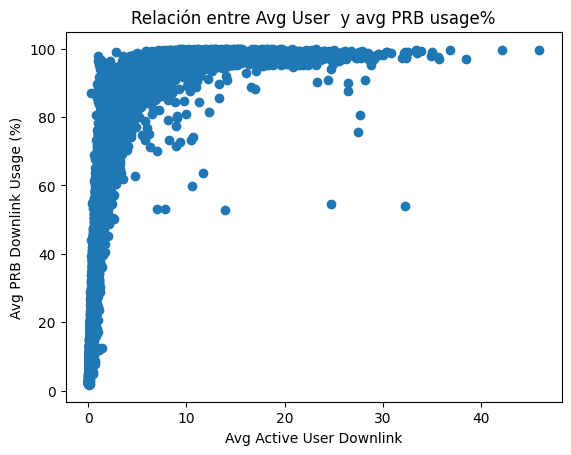

In [ ]:
plt.scatter(df['Avg Active User Downlink'], df['Avg PRB Downlink Usage (%)'])
plt.xlabel('Avg Active User Downlink')
plt.ylabel('Avg PRB Downlink Usage (%)')
plt.title('Relación entre Avg User  y avg PRB usage%')
plt.show()

##Data KPIS

In [ ]:
ruta='/content/cell_kpi_wom_pm.parquet'
dt_1=pd.read_parquet(ruta)
dt_1

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,L.Paging.Dis.Num (None),L.Paging.Dis.PagingTimeout (None),L.Paging.Dis.PchCong (None),...,L.Thrp.Time.Active.Cell.UL (ms),L.Thrp.Time.DL.RmvLastTTI.BorderUE (ms),L.Thrp.Time.DL.RmvLastTTI.BorderUE.JointTransmit (ms),L.Thrp.Time.DL.TrafficSizeBased (ms),L.Thrp.Time.UE.UL.Experienced (ms),L.Thrp.Time.UE.UL.FirstPktDelay (ms),L.Thrp.Time.UL.RmvSmallPkt.BorderUE (ms),L.Thrp.Time.UL.RmvSmallPkt.BorderUE.JointReception (ms),L.Thrp.Time.WBB.UL.Experienced (ms),L.Thrp.UL.FirstPktNum (packet)
0,2023-07-23 22:00:00-316676,316676,1237,4,2023-07-23 22:00:00,2023-07-23,22:00,0.0,0.0,0.0,...,0.0,0.0,0.0,9714924.0,4841277.0,0.0,0.0,0.0,0.0,0.0
1,2023-07-24 11:00:00-316676,316676,1237,4,2023-07-24 11:00:00,2023-07-24,11:00,0.0,0.0,0.0,...,0.0,0.0,0.0,12034111.0,5358227.0,0.0,0.0,0.0,0.0,0.0
2,2023-07-25 13:00:00-316676,316676,1237,4,2023-07-25 13:00:00,2023-07-25,13:00,0.0,0.0,0.0,...,0.0,0.0,0.0,9665696.0,6480733.0,0.0,0.0,0.0,0.0,0.0
3,2023-07-26 09:00:00-316676,316676,1237,4,2023-07-26 09:00:00,2023-07-26,09:00,0.0,0.0,0.0,...,0.0,0.0,0.0,7816143.0,5700958.0,0.0,0.0,0.0,0.0,0.0
4,2023-07-27 09:00:00-316676,316676,1237,4,2023-07-27 09:00:00,2023-07-27,09:00,0.0,0.0,0.0,...,0.0,0.0,0.0,8376116.0,6186483.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23176,2023-07-31 12:00:00-270341,270341,1056,5,2023-07-31 12:00:00,2023-07-31,12:00,0.0,0.0,0.0,...,0.0,0.0,0.0,1197539.0,1552021.0,0.0,0.0,0.0,0.0,0.0
23177,2023-08-01 21:00:00-270341,270341,1056,5,2023-08-01 21:00:00,2023-08-01,21:00,0.0,0.0,0.0,...,0.0,0.0,0.0,1037228.0,1794085.0,0.0,0.0,0.0,0.0,0.0
23178,2023-08-02 21:00:00-270341,270341,1056,5,2023-08-02 21:00:00,2023-08-02,21:00,0.0,0.0,0.0,...,0.0,0.0,0.0,1169806.0,2074742.0,0.0,0.0,0.0,0.0,0.0
23179,2023-08-03 14:00:00-270341,270341,1056,5,2023-08-03 14:00:00,2023-08-03,14:00,0.0,0.0,0.0,...,0.0,0.0,0.0,892657.0,1983928.0,0.0,0.0,0.0,0.0,0.0


##Limpieza de data

In [ ]:
dt_1['L.Paging.Dis.Num (None)'].value_counts()

0.0    23181
Name: L.Paging.Dis.Num (None), dtype: int64

In [ ]:
df_sin_ceros = dt_1.loc[:, (dt_1 != 0.0).any()]
#df_sin_ceros

In [ ]:
# Calcular el porcentaje de ceros en cada columna
porcentaje_ceros = (dt_1 == 0.0).sum() / len(dt_1) * 100

# Identificar las columnas que tienen más del 5% de ceros
columnas_a_eliminar = porcentaje_ceros[porcentaje_ceros > 5].index

# Eliminar las columnas identificadas
dt_limpio = dt_1.drop(columns=columnas_a_eliminar)
#dt_limpio

#Eliminamos los valores nulos

In [ ]:
df=dt_limpio.dropna(axis=1,how='all')
df.head()

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,L.Paging.S1.Rx (None),L.Paging.S1.Rx.CS (None),L.Paging.UU.Att (None),...,L.Thrp.bits.DL.PDCP.PDU.QCI.5 (bit),L.Thrp.bits.DL.PDCP.PDU.QCI.6 (bit),L.Thrp.bits.DL.TrafficSizeBased (bit),L.Thrp.bits.UL.PDCP.SDU.QCI.1 (bit),L.Thrp.bits.UL.PDCP.SDU.QCI.5 (bit),L.Thrp.bits.UL.PDCP.SDU.QCI.6 (bit),L.Thrp.bits.UL.PDCP.Send (bit),L.Thrp.Time.Active.Cell.DL (ms),L.Thrp.Time.DL.TrafficSizeBased (ms),L.Thrp.Time.UE.UL.Experienced (ms)
0,2023-07-23 22:00:00-316676,316676,1237,4,2023-07-23 22:00:00,2023-07-23,22:00,73414.0,114.0,73425.0,...,2783272.0,1.871741e+10,1.841538e+10,21350768.0,4292856.0,8.348166e+08,8.604710e+08,3473903.0,9714924.0,4841277.0
1,2023-07-24 11:00:00-316676,316676,1237,4,2023-07-24 11:00:00,2023-07-24,11:00,126592.0,487.0,126591.0,...,5464104.0,2.443555e+10,2.375851e+10,45008936.0,7137920.0,1.459855e+09,1.512446e+09,3546754.0,12034111.0,5358227.0
2,2023-07-25 13:00:00-316676,316676,1237,4,2023-07-25 13:00:00,2023-07-25,13:00,119446.0,426.0,119416.0,...,7362104.0,2.896190e+10,2.520933e+10,38097816.0,9077944.0,1.764101e+09,1.811462e+09,3389909.0,9665696.0,6480733.0
3,2023-07-26 09:00:00-316676,316676,1237,4,2023-07-26 09:00:00,2023-07-26,09:00,131894.0,582.0,131903.0,...,4924720.0,2.319814e+10,2.262758e+10,38753544.0,6640520.0,1.453129e+09,1.498630e+09,3364445.0,7816143.0,5700958.0
4,2023-07-27 09:00:00-316676,316676,1237,4,2023-07-27 09:00:00,2023-07-27,09:00,120394.0,440.0,120360.0,...,6519224.0,1.496077e+10,1.442992e+10,18383568.0,9527768.0,1.598915e+09,1.627505e+09,3108025.0,8376116.0,6186483.0


In [ ]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages[missing_percentages!=0]

L.Voice.UL.PktJitter.Mean (ms)                   0.011734
L.Voice.UL.PktInterval.Mean (ms)                 0.011259
L.Voice.DL.PktInterval.Mean (ms)                 0.009879
L.DLPSServ.EstDelay.Avg.Idle (ms)                0.001467
L.ULPSServ.EstDelay.Avg.Idle (ms)                0.000733
L.E-RAB.InitSuccEst Rate (%)                     0.000388
L.E-RAB.InitEst.TimeAvg (ms)                     0.000388
L.E-RAB.InitEst.TimeMax (ms)                     0.000388
L.E-RAB.Est.TimeAvg (ms)                         0.000302
L.E-RAB.Est.TimeMax (ms)                         0.000302
L.RRC.ConnSetup.TimeAvg (ms)                     0.000302
L.RRC.ConnSetup.TimeMax (ms)                     0.000302
L.Traffic.DL.SCH.64QAM.ErrTB.bits.Rbler (bit)    0.000043
dtype: float64

##Porcentaje de valores faltantes

<Axes: >

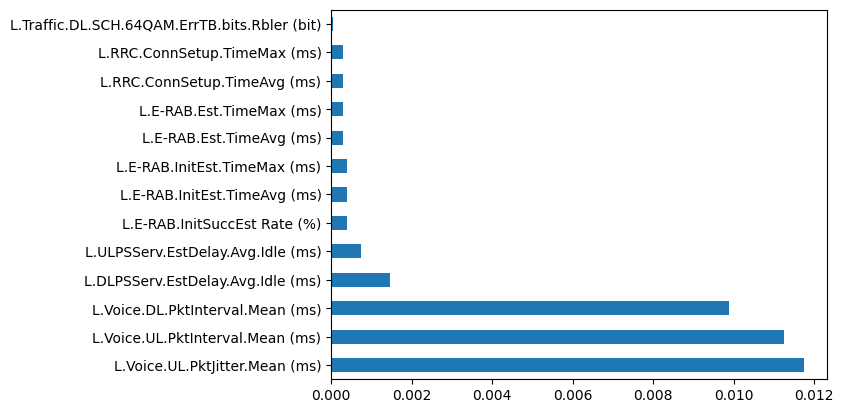

In [ ]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

In [ ]:
df.dropna(axis=0, inplace=True)

<ipython-input-14-0bb169f49cd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [ ]:
def find_optimal_clusters(data, max_clusters):
    inertias = []
    for num_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


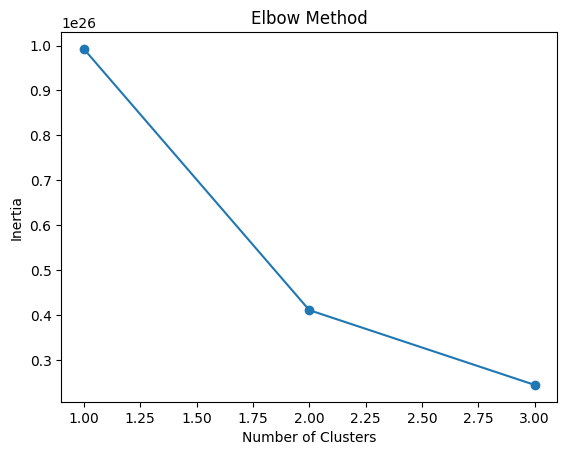

In [ ]:
columns_to_cluster = df.columns[8:]

# Obtener los datos para el clustering
data_for_clustering = df[columns_to_cluster]

# Convertir los datos a una matriz numpy
data_matrix = data_for_clustering.to_numpy()

# Llamar a la función para encontrar el número óptimo de clústeres
find_optimal_clusters(data_matrix, max_clusters=3)

Objetivo es encontrar un punto en el gráfico donde la variabilidad (o dispersión) intra-cluster disminuye drásticamente. Este punto es a menudo llamado el "punto del codo".

#Con esto identificamos que trabajando con dos clusters reducimos el error

In [ ]:
df.dropna(axis=0,inplace=True)

<ipython-input-11-51e2c94c543c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)


In [ ]:
columns_to_cluster = df.columns[8:]

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_cluster])

# Crear un objeto KMeans con el número de clústeres deseado
n_clusters = 2  # Número de clústeres
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar el modelo a los datos
kmeans.fit(scaled_data)

# Agregar las etiquetas de clúster al DataFrame
df['Cluster'] = kmeans.labels_

# Identificar las características similares en cada clúster
cluster_features = {}
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id][columns_to_cluster]
    avg_feature_values = cluster_data.mean()
    similar_features = avg_feature_values[avg_feature_values > avg_feature_values.median()]
    cluster_features[cluster_id] = similar_features.index.tolist()

# Mostrar las características similares en cada clúster
for cluster_id, features in cluster_features.items():
    print(f'Cluster {cluster_id}: Características similares: {features}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-e73ef7571fd8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


Cluster 0: Características similares: ['L.Paging.UU.Att (None)', 'L.Paging.UU.Num (None)', 'L.Traffic.PCH.TB.bits (bit)', 'L.Traffic.PktInterval.Num.Index0 (None)', 'L.Traffic.Sch.DL.Num (None)', 'L.Traffic.Sch.UL.Num (None)', 'L.Traffic.Schedule.Dedicated.Avg (None)', 'L.Traffic.UL.SCH.16QAM.ErrTB.Ibler (None)', 'L.Traffic.UL.SCH.16QAM.TB (None)', 'L.Traffic.UL.SCH.16QAM.TB.bits (bit)', 'L.Traffic.UL.SCH.16QAM.TB.NACK (None)', 'L.Traffic.UL.SCH.16QAM.TB.QCI.1 (None)', 'L.Traffic.UL.SCH.16QAM.TB.Retrans (None)', 'L.Traffic.UL.SCH.16QAM.TB.Retrans.bits (bit)', 'L.Traffic.UL.SCH.64QAM.ErrTB.Ibler (None)', 'L.Traffic.UL.SCH.64QAM.TB (None)', 'L.Traffic.UL.SCH.64QAM.TB.bits (bit)', 'L.Traffic.UL.SCH.64QAM.TB.NACK (None)', 'L.Traffic.UL.SCH.64QAM.TB.Retrans (None)', 'L.Traffic.UL.SCH.64QAM.TB.Retrans.bits (bit)', 'L.Traffic.UL.SCH.bits.Max (bit)', 'L.Traffic.UL.SCH.ErrTB.Ibler.QCI6 (None)', 'L.Traffic.UL.SCH.PoorChannelQuality.ErrTB.Rbler (None)', 'L.Traffic.UL.SCH.PoorChannelQuality.TB (No

In [ ]:
# Crear un DataFrame con las características promedio de cada clúster
cluster_df = pd.DataFrame()
for cluster_id, features in cluster_features.items():
    cluster_data = df[df['Cluster'] == cluster_id][features].mean()
    cluster_df[f'Cluster_{cluster_id}'] = cluster_data

# Mostrar el DataFrame con las características de los clústeres
clusters=cluster_df.T
clusters.head()







,L.Paging.UU.Att (None),L.Paging.UU.Num (None),L.Traffic.PCH.TB.bits (bit),L.Traffic.PktInterval.Num.Index0 (None),L.Traffic.Sch.DL.Num (None),L.Traffic.Sch.UL.Num (None),L.Traffic.Schedule.Dedicated.Avg (None),L.Traffic.UL.SCH.16QAM.ErrTB.Ibler (None),L.Traffic.UL.SCH.16QAM.TB (None),L.Traffic.UL.SCH.16QAM.TB.bits (bit),...,L.Thrp.bits.DL.PDCP.PDU.QCI.5 (bit),L.Thrp.bits.DL.PDCP.PDU.QCI.6 (bit),L.Thrp.bits.DL.TrafficSizeBased (bit),L.Thrp.bits.UL.PDCP.SDU.QCI.1 (bit),L.Thrp.bits.UL.PDCP.SDU.QCI.5 (bit),L.Thrp.bits.UL.PDCP.SDU.QCI.6 (bit),L.Thrp.bits.UL.PDCP.Send (bit),L.Thrp.Time.Active.Cell.DL (ms),L.Thrp.Time.DL.TrafficSizeBased (ms),L.Thrp.Time.UE.UL.Experienced (ms)
Cluster_0,337464.727402,201233.425760,1.819300e+07,31134.444761,2.354167e+06,2.437015e+06,3.183048e+06,58462.024634,1.333943e+06,2.044243e+09,...,3.762077e+06,2.741646e+10,2.497271e+10,4.615701e+07,4.657911e+06,2.034956e+09,2.086395e+09,2.500243e+06,5.132093e+06,3.242556e+06
Cluster_1,384490.688665,219691.816609,2.057518e+07,93901.443940,3.457714e+06,3.158653e+06,6.775920e+06,132328.269995,2.122614e+06,4.181386e+09,...,1.271603e+07,5.066482e+10,4.494655e+10,1.437830e+08,1.578927e+07,5.018625e+09,5.180564e+09,3.515390e+06,2.282909e+07,1.279842e+07


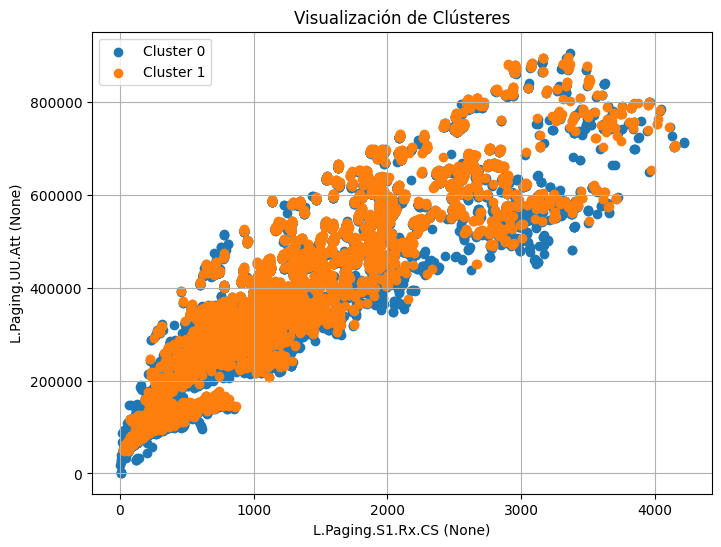

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para la visualización
plt.figure(figsize=(8, 6))

# Iterar a través de cada clúster
for cluster_id in range(n_clusters):
    # Filtrar los puntos de datos en el clúster actual
    cluster_data = df[df['Cluster'] == cluster_id]

    # Graficar los puntos del clúster actual
    plt.scatter(cluster_data[columns_to_cluster[0]], cluster_data[columns_to_cluster[1]], label=f'Cluster {cluster_id}')

# Agregar etiquetas y título
plt.xlabel(columns_to_cluster[0])
plt.ylabel(columns_to_cluster[1])
plt.title('Visualización de Clústeres')
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

**Despues de realizar la agrupacion por los clusters nos dimos cuentas que los valores de los clusters no difieren significativamente, por lo cual no vimos pertinente realizar un modelo predictivo con dichos valores frente a la lista de KPIs, por tal motivo continuamos nuestro analisis con la información fisica de la celdas**

##Limpieza del DataFrame de las celdas fisicas

In [ ]:
dt.head()

,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Azimuth,ET,MT,HBW,VBW,Max Power,EARFCN,Bandwidth,MCC,MNC,Band,City,Cluster
0,258823,1011,7,4.625846,-74.177726,26.0,350,6.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
1,258824,1011,8,4.625846,-74.177726,26.0,90,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
2,258825,1011,9,4.625846,-74.177726,26.0,210,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
3,259079,1012,7,4.610833,-74.184167,20.0,5,8.0,0,65,7.0,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
4,259080,1012,8,4.610833,-74.184167,20.0,135,12.0,0,65,7.0,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1


Eliminacion de columnas con valores repetidos, columnas que tienen poca relevancia

In [ ]:
columnas_a_eliminar = ["Azimuth", "ET", "MT", "HBW", "VBW", "Bandwidth", "MCC", "MNC", "City", "Cluster"]
dtfisico = dt.drop(columnas_a_eliminar, axis=1)
dtfisico

,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Max Power,EARFCN,Band
0,258823,1011,7,4.625846,-74.177726,26.0,43.0,2950,B7
1,258824,1011,8,4.625846,-74.177726,26.0,43.0,2950,B7
2,258825,1011,9,4.625846,-74.177726,26.0,43.0,2950,B7
3,259079,1012,7,4.610833,-74.184167,20.0,43.0,2950,B7
4,259080,1012,8,4.610833,-74.184167,20.0,43.0,2950,B7
...,...,...,...,...,...,...,...,...,...
1787,325890,1273,2,5.313090,-72.399700,15.0,43.0,2050,AWS
1788,325891,1273,3,5.313090,-72.399700,15.0,43.0,2050,AWS
1789,326145,1274,1,5.350880,-72.382050,29.0,43.0,2050,AWS
1790,326146,1274,2,5.350880,-72.382050,29.0,43.0,2050,AWS


#Juntamos el DataFrame de los KPI capacity Junto con KPI Total

In [ ]:
#merged_df = pd.merge(df, dtfisico, on="key")
merged_df = pd.merge(df, df_2, on="key")
merged_df

,key,Cell Code_x,Site Code_x,Sector ID_x,DateTime_x,Date_x,Time_x,L.Paging.S1.Rx (None),L.Paging.S1.Rx.CS (None),L.Paging.UU.Att (None),...,L.Thrp.Time.UE.UL.Experienced (ms),Cell Code_y,Site Code_y,Sector ID_y,DateTime_y,Date_y,Time_y,Avg User Downlink Throughput (kbit/s),Avg PRB Downlink Usage (%),Avg Active User Downlink
0,2023-07-23 22:00:00-316676,316676,1237,4,2023-07-23 22:00:00,2023-07-23,22:00,73414.0,114.0,73425.0,...,4841277.0,316676,1237,4,2023-07-23 22:00:00,2023-07-23,22:00,1960.16,85.47,2.843
1,2023-07-24 11:00:00-316676,316676,1237,4,2023-07-24 11:00:00,2023-07-24,11:00,126592.0,487.0,126591.0,...,5358227.0,316676,1237,4,2023-07-24 11:00:00,2023-07-24,11:00,2050.70,87.13,3.596
2,2023-07-25 13:00:00-316676,316676,1237,4,2023-07-25 13:00:00,2023-07-25,13:00,119446.0,426.0,119416.0,...,6480733.0,316676,1237,4,2023-07-25 13:00:00,2023-07-25,13:00,2794.75,82.70,3.022
3,2023-07-26 09:00:00-316676,316676,1237,4,2023-07-26 09:00:00,2023-07-26,09:00,131894.0,582.0,131903.0,...,5700958.0,316676,1237,4,2023-07-26 09:00:00,2023-07-26,09:00,2994.25,79.22,2.386
4,2023-07-27 09:00:00-316676,316676,1237,4,2023-07-27 09:00:00,2023-07-27,09:00,120394.0,440.0,120360.0,...,6186483.0,316676,1237,4,2023-07-27 09:00:00,2023-07-27,09:00,1816.66,72.21,2.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23176,2023-07-31 12:00:00-270341,270341,1056,5,2023-07-31 12:00:00,2023-07-31,12:00,346935.0,1619.0,346945.0,...,1552021.0,270341,1056,5,2023-07-31 12:00:00,2023-07-31,12:00,10050.55,27.73,0.563
23177,2023-08-01 21:00:00-270341,270341,1056,5,2023-08-01 21:00:00,2023-08-01,21:00,194605.0,378.0,194509.0,...,1794085.0,270341,1056,5,2023-08-01 21:00:00,2023-08-01,21:00,7947.00,23.43,0.428
23178,2023-08-02 21:00:00-270341,270341,1056,5,2023-08-02 21:00:00,2023-08-02,21:00,194524.0,405.0,194529.0,...,2074742.0,270341,1056,5,2023-08-02 21:00:00,2023-08-02,21:00,11103.55,24.61,0.465
23179,2023-08-03 14:00:00-270341,270341,1056,5,2023-08-03 14:00:00,2023-08-03,14:00,350699.0,1517.0,350613.0,...,1983928.0,270341,1056,5,2023-08-03 14:00:00,2023-08-03,14:00,4679.20,21.34,0.406


In [ ]:
merged_df.to_parquet("merged_df.parquet")

In [ ]:
c_carac=merged_df.iloc[:,10:60]
c_numericas=c_carac.select_dtypes(include=['int','float'])
nombres_columnas=c_numericas.columns.tolist()
#nombres_columnas

Filtramos todas las columnas que tuvieras valores numericos y estuvieran en la poscion de la tabla 10 a 60

In [ ]:
x=merged_df[nombres_columnas]#features
#x.descibe()

In [ ]:
y=merged_df['Avg PRB Downlink Usage (%)']#target

Definimos nuestras variables caracteristicas y variable objetivo la cual es Avr PRB Downlink usage

In [ ]:
merged_df.shape

(23181, 1198)

#Creacion del modelo Ramdom Forest

In [ ]:
# Paso 2: Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Paso 3: Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Paso 4: Realizar predicciones
predictions = model.predict(X_test)

# Paso 5: Evaluar el rendimiento
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.7598463381496683


In [ ]:
# Obtener la importancia de las características
importancias = model.feature_importances_

# Obtener los nombres de las características
nombres_caracteristicas = x.columns.tolist()

# Crear un diccionario con las importancias y los nombres de las características
importancias_dict = dict(zip(nombres_caracteristicas, importancias))

# Ordenar las características por importancia en orden descendente
importancias_ordenadas = sorted(importancias_dict.items(), key=lambda x: x[1], reverse=True)

# Mostrar las 5 características más representativas
print("Las 5 características más representativas:")
for caracteristica, importancia in importancias_ordenadas[:5]:
    print(f"{caracteristica}: {importancia}")

Las 5 características más representativas:
L.Traffic.Sch.DL.Num (None): 0.9719626794236951
L.Traffic.Schedule.Dedicated.Avg (None): 0.015380951638030532
L.Traffic.PktInterval.Num.Index0 (None): 0.00437411627367602
L.Traffic.Sch.UL.Num (None): 0.001096408910747034
L.Paging.UU.Num (None): 0.0010129464743629457


#Conclusion

**Identificamos que las columnas de 'L.Traffic.Sch.DL.Num' , 'L.Traffic.Schedule.Dedicate.AVf' y 'L.Traffic.Pktinterval.Num' Fueron las fuentes de datos mas representativas al momento de realizar nuestro modelo 'Random Forest' en el cual obtuvimos un error del 2.8% En la precision. Encontramos que con estas fuentes de datos podemos predecir con exactitud que tantos recursos usara en promedio nuestras celdas**

**Por temas de tiempo y memoria limitada de nuestro entorno de trabajo, segementamos las columnas para usar unicamente 50, de las mas de 1000 columnas con las cuales pudimos haber usado para nuestro modelo, es decir nuestro modelo es escalable**